### Coding the first Neuron

In [8]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from IPython.display import Image

At the moment, we’re modeling a single neuron with three inputs. Since we’re modeling a single neuron, we only have one bias, as there’s just one bias value per neuron. 

The bias is an additional tunable value but is not associated with any input in contrast to the weights. We’ll randomly select a value of 2 as the bias for this example:


In [3]:
#First neuron with 3 inputs 

inputs = [1,2,3]

weights = [0.2,0.8,-0.5]

bias = 2



This neuron sums each input multiplied by that input’s weight, then adds the bias. All the neuron does is take the fractions of inputs, where these fractions (weights) are the adjustable parameters, and adds another adjustable parameter — the bias — then outputs the result. 

Our output would be calculated up to this point like:

In [4]:
output= (inputs[0]*weights[0]+
         inputs[1]*weights[1]+
         inputs[2]*weights[2]+ bias
         )

In [7]:
print(output)

2.3


**Neural networks** typically have layers that consist of more than one neuron. Layers are nothing more than groups of neurons. Each neuron in a layer takes exactly the same input — the input given to the layer (which can be either the training data or the output from the previous layer), but contains its own set of weights and its own bias, producing its own unique output. The layer’s output is a set of each of these outputs — one per each neuron. Let’s say we have a scenario with 3 neurons in a layer and 4 inputs:

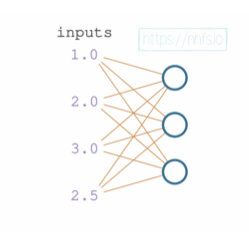

In [13]:
Image("Images/Neuron.png")

In [17]:
from random import seed
from random import randint

#seed nr generator

seed(1)

#generate some integers

for _ in range(4):
    value = randint(0,4)
    print(value)
    




1
4
0
2


In [31]:

# generate random floating point values
from random import seed
from random import random
# seed random number generator
seed(1)

# generate random numbers between 0-1

for _ in range(4):
	weights1 = randint(0,4)
	print(weights1)
    
for _ in range(4):
	weights2 = randint(0,4)
	print(weights2)
    
    
for _ in range(4):
	weights3 = randint(0,4)
	print(weights3)    

1
4
0
2
0
3
3
3
3
1
0
3


In [42]:
inputs = [1,2,3,2.5]

weights1 = [0.2,0.8,-0.5,1]
weights2 = [0.5,-0.91,0.26,-0.5]
weights3 = [-0.26,-0.27,0.17,0.87]


bias1 = 2
bias2 = 3 
bias3 = 0.5


In [43]:


outputs = [
          # Neuron 1:
          inputs[0]*weights1[0] +
          inputs[1]*weights1[1] +
          inputs[2]*weights1[2] +
          inputs[3]*weights1[3] + bias1,
# Neuron 2:
          inputs[0]*weights2[0] +
          inputs[1]*weights2[1] +
          inputs[2]*weights2[2] +
          inputs[3]*weights2[3] + bias2,
# Neuron 3:
          inputs[0]*weights3[0] +
          inputs[1]*weights3[1] +
          inputs[2]*weights3[2] +
          inputs[3]*weights3[3] + bias3]
print(outputs)

[4.8, 1.21, 2.385]


At this point, we have only shown code for a single layer with very few neurons. Imagine coding many more layers and more neurons. This would get very challenging to code using our current methods. Instead, we could use **a loop** to scale and handle dynamically-sized inputs and layers. We’ve turned the separate weight variables into a list of weights so we can iterate over them, and we changed the code to use loops instead of the hardcoded operations.

In [44]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]


In [41]:
#instantiating the output layer
layer_outputs = []

#for each neuron
for neuron_weights, neuron_bias in zip(weights, biases):
    #zeroed output of given neuron
    neuron_output = 0
    #for each input and weight to the neuron
    for n_input, weight in zip(inputs, neuron_weights):
        # * this input by associated weight and
        # add to the neuron's output variable 
        neuron_output += n_input*weight
    #add bias 
    neuron_output += neuron_bias
    # add neuron's result to the layer;s output list 
    layer_outputs.append(neuron_output)
    
print(layer_outputs)    

[4.8, 1.21, 2.385]


This does the same thing as before, just in a more dynamic and scalable way. If you find yourself confused at one of the steps, **print()** out the objects to see what they are and what’s happening. 

**The zip()** function lets us iterate over multiple iterables (lists in this case) simultaneously. Again, all we’re doing is, for each neuron (the outer loop in the code above, over neuron weights and biases), taking each input value multiplied by the associated weight for that input (the inner loop in the code above, over inputs and weights), adding all of these together, then adding a bias at the end. Finally, sending the neuron’s output to the layer’s output list.

## The dot product
Another mystical creature from the past (my old math teacher would laugh seeing me now resseting the boundaries of what was once taught )

A dot product of two vectors is a sum of products of consecutive vector elements. Both vectors must be of the same size (have an equal number of elements).


In [46]:
a = [1,2,3]

b = [2,3,4]

In [47]:
dot_product = a[0]*b[0]+a[1]*b[1]+a[2]*b[2]

print(dot_product)

20


Math visualisation behind the dot product

https://nnfs.io/xpo/

Now, what if we called a “inputs” and b “weights?” Suddenly, this dot product looks like a succinct way to perform the operations we need and have already performed in plain Python. We need to multiply our weights and inputs of the same index values and add the resulting values together.

The dot product performs this exact type of operation; thus, it makes lots of sense to use here. Returning to the neural network code, let’s make use of this dot product. Plain Python does not contain methods or functions to perform such an operation, so we’ll use the NumPy package, which is capable of this, and many more operations that we’ll use in the future.

### Using NumPy to code a single Neuron


More efficient , scalable and faster

In [48]:
import numpy as np

inputs = [1.0,2.0,3.0,2.5]
weights= [0.2,0.8,-0.5,1.0]

bias = 2.0

In [50]:
outputs = np.dot(weights,inputs) + bias

print(outputs)

4.8


### A Layer of neurons with NumPy

Now we’re back to the point where we’d like to calculate the output of a layer of 3 neurons, which means the weights will be a matrix or list of weight vectors. In plain Python, we wrote this as a list of lists. With NumPy, this will be a 2-dimensional array, which we’ll call a matrix. Previously with the 3-neuron example, we performed a multiplication of those weights with a list containing inputs, which resulted in a list of output values — one per each neuron.

**When we add two vectors using NumPy, each i-th element is added together, resulting in a new vector of the same size. This is both a simplification and an optimization, giving us simpler and faster code.**


In [52]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

In [54]:
layer_outputs = np.dot(weights, inputs)+ biases

print(layer_outputs)

[4.8   1.21  2.385]


### Matrix Product

The matrix product is an operation in which we have 2 matrices, and we are performing dot products of all combinations of rows from the first matrix and the columns of the 2nd matrix, resulting in a matrix of those atomic dot product


Visual calculation on a single resulting matrix from matrix product
https://nnfs.io/jei/

With NumPy and with 3 values, we would define it as:

In [56]:
np.array([[1,2,3]])

array([[1, 2, 3]])

In [57]:
a = [1,2,3]
print(np.array([a]))

[[1 2 3]]


In [58]:
a = [1,2,3]

print(np.expand_dims(np.array(a),axis = 0))

[[1 2 3]]


**To turn vector b into row vector b, we’ll use the same method that we used to turn vector a into row vector a, then we can perform a transposition on it to make it a column vector b:**

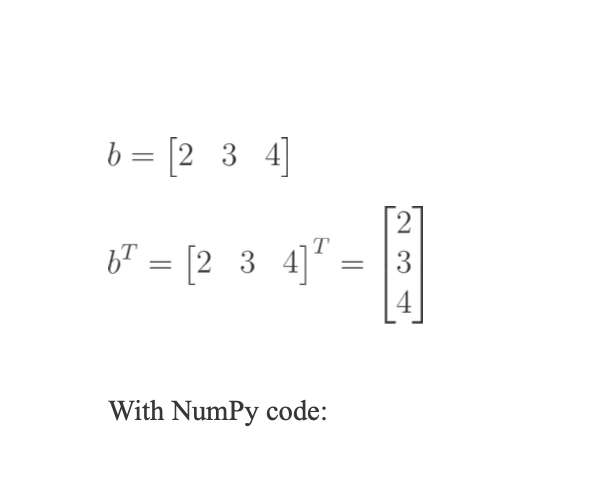

In [59]:
Image("Images/MatrixT.png")

In [61]:
a = [1,2,3]
b = [2,3,4]

a = np.array([a])
b = np.array([b]).T

print(np.dot(a,b))

[[20]]


In [62]:
inputs = [[1.0, 2.0, 3.0, 2.5],
          [0.5, -0.70, 0.20, -0.5],
          [-0.16, -0.22, 0.17, 0.87]]
weights = [[0.2, 0.8, -0.5, 1],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

outputs = np.dot(inputs, np.array(weights).T)+biases

In [63]:
np.dot(inputs, np.array(weights).T)

array([[ 2.8   , -1.79  ,  1.885 ],
       [-1.06  ,  1.189 , -0.342 ],
       [ 0.577 , -0.2706,  0.8868]])